In [141]:
import numpy as np
from gensim.models import Word2Vec
import snap
import operator
import snap
from scipy.stats import binom
import matplotlib.pyplot as plt

In [142]:
def getNumAcquired(sim_rankings, acquired_companies_in_graph_by_id, k):
    top_rankings = sim_rankings[:k]
    result = 0
    
    for tup in top_rankings:
        company_id = int(tup[0])
        if company_id in acquired_companies_in_graph_by_id: result += 1
    
    return result

In [143]:
def getAcquiredToNumAcquired(k, node_to_sorted_L2_similarities, acquired_companies_in_graph_by_id):
    acquired_to_num_acquired = {}

    for company_id in acquired_companies_in_graph_by_id:
        sim_rankings = node_to_sorted_L2_similarities[str(company_id)]
        acquired_to_num_acquired[company_id] = getNumAcquired(sim_rankings, acquired_companies_in_graph_by_id, k)
                                     
    return acquired_to_num_acquired

In [155]:
def getNullProbs(acquired_to_num_acquired, n, p):
    result = {}
    
    for key in acquired_to_num_acquired:
        result[key] = binom.pmf(acquired_to_num_acquired[key], n, p)
        
    return result

In [7]:
# Returns a list sorted from the node with the least l2 distance to 
# reference node to the node with the greatest l2 distance
def calculateSortedL2Similarity(reference_node, model):
    reference_embeddings = model[reference_node]
    l2_similarities = {}

    for key in model.vocab:
        if key != reference_node:
            curr_l2 = np.linalg.norm(reference_embeddings - model[key])
            l2_similarities[key] = curr_l2

    sorted_l2_similarities = sorted(l2_similarities.items(), key=operator.itemgetter(1))
    return sorted_l2_similarities

In [8]:
def createSortedSimilaritesMap(model):
    result = {}
    for key in model.vocab:
        result[key] = calculateSortedL2Similarity(key, model)
    return result

In [9]:
# Load the embeddings from memory
BFS_model = Word2Vec.load_word2vec_format("../node2vec_embeddings/company_embeddings_p1_q100.emd")
neutral_model = Word2Vec.load_word2vec_format("../node2vec_embeddings/company_embeddings_p1_q1.emd")
DFS_model = Word2Vec.load_word2vec_format("../node2vec_embeddings/company_embeddings_p1_q0_01.emd")

In [10]:
BFS_nodeToSortedL2Similarities = createSortedSimilaritesMap(BFS_model)
print "Completed BFS model"
neutral_nodeToSortedL2Similarities = createSortedSimilaritesMap(neutral_model)
print "Completed neutral model"
DFS_nodeToSortedL2Similarities = createSortedSimilaritesMap(DFS_model)
print "Completed DFS model"

Completed BFS model
Completed neutral model
Completed DFS model


In [15]:
'''
DO NOT RUN THIS AGAIN!

np.save("../node2vec_embeddings/nodeToSortedL2Similarities_p1_q100", BFS_nodeToSortedL2Similarities)
np.save("../node2vec_embeddings/nodeToSortedL2Similarities_p1_q1", neutral_nodeToSortedL2Similarities)
np.save("../node2vec_embeddings/nodeToSortedL2Similarities_p1_q0_01", DFS_nodeToSortedL2Similarities)
'''

In [35]:
# These are all of the acquired companies we know about
acquired_companies = set(np.load("../acquired_companies.npy"))

4563


In [114]:
# Now we find the overlap between companies in our graph and the set of acquired companies
node_id_to_value = np.load("../../graphs/investors_to_companies_directed/node_id_to_value.npy").item()
FIn = snap.TFIn("../../graphs/investors_to_companies_directed/investors_to_companies_directed_folded_reverse_order.graph")
G = snap.TUNGraph.Load(FIn)

companies_in_graph = set()
for EI in G.Edges(): 
    curr_src_id = EI.GetSrcNId()
    curr_dst_id = EI.GetDstNId()
    companies_in_graph.add(node_id_to_value[curr_src_id])
    companies_in_graph.add(node_id_to_value[curr_dst_id])
    
# These are the acquired companies in our folded graph
acquired_companies_in_graph = companies_in_graph.intersection(acquired_companies)

acquired_companies_in_graph_by_id = []
value_to_node_id = {v: k for k, v in node_id_to_value.iteritems()}
for company in acquired_companies_in_graph:
    acquired_companies_in_graph_by_id.append(value_to_node_id[company])

In [186]:
k = 10
acquired_to_num_acquired_BFS = getAcquiredToNumAcquired(k, BFS_nodeToSortedL2Similarities, acquired_companies_in_graph_by_id)
acquired_to_num_acquired_neutral = getAcquiredToNumAcquired(k, neutral_nodeToSortedL2Similarities, acquired_companies_in_graph_by_id)
acquired_to_num_acquired_DFS = getAcquiredToNumAcquired(k, DFS_nodeToSortedL2Similarities, acquired_companies_in_graph_by_id)

# Make a plot for each of BFS, neutral, and DFS
# x axis will be node id
# y axis will be probability under null (binomial) model
p = float(len(acquired_companies_in_graph_by_id)) / len(companies_in_graph)
BFS_null_model_probabilities = getNullProbs(acquired_to_num_acquired_BFS, k, p)
neutral_null_model_probabilities = getNullProbs(acquired_to_num_acquired_neutral, k, p)
DFS_null_model_probabilities = getNullProbs(acquired_to_num_acquired_DFS, k, p)


3
30
86
88
134
157
159
160
161
172
173
178
180
185
210
216
228
247
273
285
300
342
343
355
361
427
435
443
478
479
481
486
487
488
493
494
495
497
507
514
515
516
535
554
557
619
620
621
649
663
716
752
766
783
788
789
791
793
795
797
799
804
806
808
813
816
817
819
822
836
841
871
876
997
1062
1068
1143
1236
1238
1240
1248
1266
1281
1414
1435
1450
1458
1556
1565
1600
1611
1621
1622
1626
1630
1650
1676
1691
1692
1694
1704
1715
1753
1786
1787
1788
1789
1801
1834
1840
1856
1864
1931
1933
1944
1952
1956
1957
1990
2008
2033
2055
2059
2076
2090
2093
2117
2120
2165
2223
2224
2231
2232
2242
2259
2302
2342
2368
2369
2402
2417
2443
2499
2537
2547
2562
2567
2570
2571
2665
2667
2672
2679
2703
2704
2812
2822
2836
2837
2895
2943
2961
2975
2981
3020
3021
3022
3024
3028
3030
3034
3039
3053
3056
3068
3069
3100
3149
3241
3269
3316
3318
3349
3368
3416
3460
3497
3510
3517
3521
3542
3547
3553
3555
3623
3627
3634
3648
3649
3670
3674
3686
3694
3695
3699
3707
3717
3718
3720
3727
3728
3730
3734
3738
3753
3756

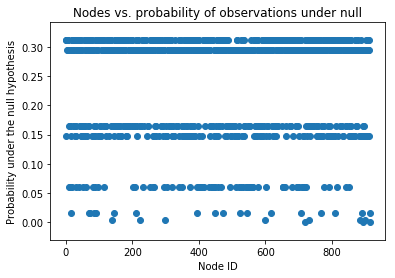

In [187]:
X = range(len(acquired_companies_in_graph_by_id))
x_vals = sorted(acquired_companies_in_graph_by_id)

y_vals = []
for val in x_vals:
    print val
    y_vals.append(neutral_null_model_probabilities[val])

plt.xlabel("Node ID")
plt.ylabel("Probability under the null hypothesis")
plt.title("Nodes vs. probability of observations under null")
plt.scatter(X, y_vals)
plt.show()